In [ ]:
#pip instll sympy

In [47]:
from IPython.display import display, Image
import pandas as pd, numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
from sympy import *

## Matrices:

### VI. Multiplicación Matricial

Una matriz $A \in R^{m \times n}$ se puede multiplicar por una matriz $M \in R^{n \times p}$; es decir, la cantidad de columnas de la primera matriz $A$ es igual a la cantidad de filas de la segunda matriz $M$.

El resultado $C$ es una matriz $m \times p$ donde cada elemento se calcula como una suma de productos:

$$C_{i,j} = \sum_{k=1}^n{A_{i,k} \times M_{k,j}}$$

La multiplicación matricial se realiza multiplicando cada elemento de una fila de la primera matriz por cada elemento de una columna de la segunda matriz y sumando los resultados. <br><br>Ejemplo de multiplicación de matrices $A$ y $M$:
<br>
$$
 C = A M = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 2 & 3 & 1 \\ 0 & 5 & -2 \end{bmatrix} = \begin{bmatrix} 1\ast2+2\ast0 & 1\ast3+2\ast5 & 1\ast1+2\ast(-2) \\ 3\ast2+4\ast0 & 3\ast3+4\ast5 & 3\ast1+4\ast(-2) \end{bmatrix} = \begin{bmatrix} 2 & 13 & -3 \\ 6 & 29 & -5 \end{bmatrix}
$$
<br>

* En otras palabras: El elemento $i,j$ de la matrix $C$ se obtiene mediante el producto punto del renglón $i$ y la columna $j$
<br><br>


#### Ejemplos:

In [2]:
A=np.array([
    [1,2],[3,4]
])
print("Matriz A: \n",A)

Matriz A: 
 [[1 2]
 [3 4]]


In [3]:
M=np.array([
    [2,3,1],
    [0,5,-2]
])
print("Matriz A: \n",M)

Matriz A: 
 [[ 2  3  1]
 [ 0  5 -2]]


In [4]:
A.shape

(2, 2)

In [5]:
M.shape

(2, 3)

In [6]:
#multiplicación matricial de A y M
C=np.dot(A,M)
print("multiplicación: \n ",C)

multiplicación: 
  [[ 2 13 -3]
 [ 6 29 -5]]


In [7]:
C.shape

(2, 3)

In [8]:
#También pueden multiplicar matrices usando el opero '@'
A @ M

array([[ 2, 13, -3],
       [ 6, 29, -5]])

In [9]:
# Notar que en general el producto NO ES CONMUTATIVO: 
C1=np.array([[1,2],[3,4]])
C2=np.array([[2,2],[3,1]])
C1

array([[1, 2],
       [3, 4]])

In [10]:
C2

array([[2, 2],
       [3, 1]])

In [11]:
print(np.dot(C1,C2), "\n"*3, np.dot(C2,C1))

[[ 8  4]
 [18 10]] 


 [[ 8 12]
 [ 6 10]]


### Espacio vectorial - noción

1. **Espacio Vectorial**: Un espacio vectorial es un conjunto de vectores junto con dos operaciones: la suma de vectores y la multiplicación por un escalar. Para ser un espacio vectorial, debe cumplir con diez axiomas, como la conmutatividad y la asociatividad de la suma, la distributividad de la multiplicación escalar sobre la suma vectorial, entre otros. Un ejemplo clásico es el conjunto de todos los vectores bidimensionales reales, denotado como $ \mathbb{R}^2 $, donde los vectores tienen la forma $(x, y)$, con $x$ y $y$ siendo números reales.
<br>
<br>
2. **Transformación Lineal**: Una transformación lineal es una función entre dos espacios vectoriales que preserva las operaciones de suma de vectores y multiplicación por escalar. Para una transformación lineal $T$, y cualquier par de vectores $\mathbf{v}$ y $\mathbf{w}$ en el espacio vectorial, y cualquier escalar $c$, se cumplen las siguientes propiedades:
    - Aditividad: $T(\mathbf{v} + \mathbf{w}) = T(\mathbf{v}) + T(\mathbf{w})$
    - Homogeneidad: $T(c\mathbf{v}) = cT(\mathbf{v})$
<br>
<br>

* Por ejemplo: $T(x)=x$ es una transformación lineal: $T(x+y) = x+y = T(x) + T(y)$,   y $T(\alpha x) =\alpha x=\alpha T(x)$ 
<br>
* $T(x) = x^2$ no es una t.lineal




3. **Matriz como Representación de una Transformación Lineal**: Una matriz puede representar una transformación lineal entre dos espacios vectoriales. Una matriz $A$ de tamaño $m \times n$ actúa como una función que transforma un vector $\mathbf{v}$ en $\mathbb{R}^n$ a un vector en $\mathbb{R}^m$. La multiplicación de matrices cumple con las propiedades de aditividad y homogeneidad, lo que significa que una matriz puede representar cualquier transformación lineal. Por ejemplo, una matriz $2 \times 2$ puede representar una transformación lineal del plano $\mathbb{R}^2$ en sí mismo, como una rotación o una dilatación.

### Concepto: Base en un espacio vectorial

Se refiere a un conjunto de vectores en un espacio vectorial que cumplen dos criterios importantes: son **linealmente independientes** y **"generan todo el espacio"**.

1. **Linealmente Independientes**: Un conjunto de vectores es linealmente independiente si ninguno de los vectores puede ser expresado como una combinación lineal de los otros. En términos más simples, esto significa que ningún vector en el conjunto es "redundante".

2. **Generan el Espacio**: Un conjunto de vectores genera un espacio vectorial si cualquier vector en ese espacio puede ser expresado como una combinación lineal de esos vectores. Es decir, con ellos se puede llegar a cualquier punto del espacio.

**Ejemplos de Bases**

*Ejemplo en $ \mathbb{R}^2 $*: Consideremos el espacio vectorial $ \mathbb{R}^2 $, que es el conjunto de todos los pares ordenados de números reales. Un ejemplo de una base para $ \mathbb{R}^2 $ es el conjunto de vectores $ \{ \mathbf{e}_1, \mathbf{e}_2 \} $, donde $ \mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ y $ \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $. Estos vectores son linealmente independientes y cualquier vector $ \mathbf{v} = \begin{bmatrix} x \\ y \end{bmatrix} $ en $ \mathbb{R}^2 $ puede ser expresado como una combinación lineal de $ \mathbf{e}_1 $ y $ \mathbf{e}_2 $.

*Ejemplo en $ \mathbb{R}^3 $*: De manera similar, en $ \mathbb{R}^3 $, el conjunto de vectores $ \{ \mathbf{e}_1, \mathbf{e}_2, \mathbf{e}_3 \} $, donde $ \mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} $, $ \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} $, y $ \mathbf{e}_3 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $, forma una base. Cualquier vector en $ \mathbb{R}^3 $ puede ser representado como una combinación de estos tres vectores.


### Veamos un ejemplo concreto de una transformación lineal y su representación matricial.

Consideremos la transformación lineal: $ \mathbb{R}^2: -> \mathbb{R}^2  $ dada por:

$$
T(x,y) = (y, -x)
$$

Para cualquier vector en el plano, esta transformación rota el vector 90º en sentido de las manecillas del reloj.
<br>
La matriz que representa esta transformación es:

$$ A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

Ejemplo: Tomemos el vector $ \mathbf{v} = \begin{bmatrix} 2 \\ 3 \end{bmatrix} $, y multipliquemos $ A $ por $ \mathbf{v} $:

$$ A\mathbf{v} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 3 \\ -2 \end{bmatrix} $$

Esto muestra que al aplicar la matriz $ A $ al vector $ \mathbf{v} $, obtenemos el vector $ \begin{bmatrix} 3 \\ -2 \end{bmatrix} $, el cual es el resultado de rotar $ \mathbf{v} $ 90 grados en **sentido horario**.


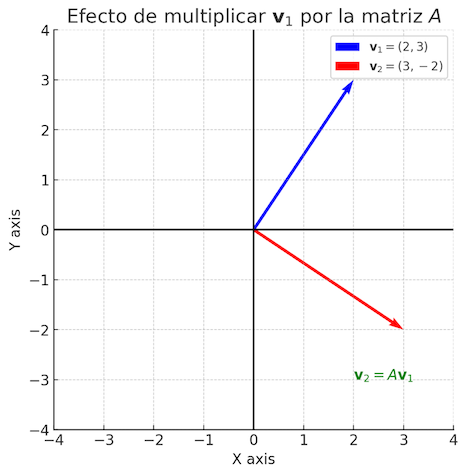

La matriz que rota un vector 90 grados en **sentido 'antihorario'** (counter clockwise) en el plano $ \mathbb{R}^2 $:

$$ C = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

Y podemos ver su efecto el vector $ v = (2,3)^t$:

Al igual que antes, usamos `np.dot()`

In [13]:
C=np.array([
    [0,-1],
    [1,0]
])
v=np.array([2,3])
z=np.dot(C,v)
z

array([-3,  2])

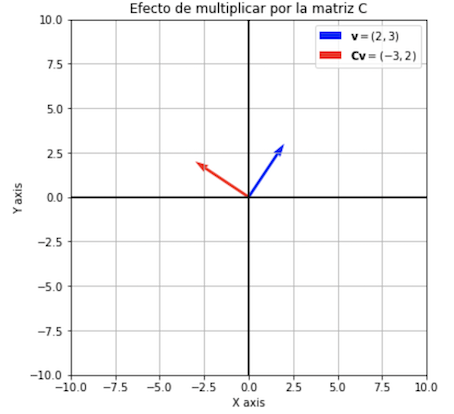

### En general cuando multiplicamos por una matriz, el vector original se rota cierto ángulo y/o se escala

<br>

Tomemos por ejemplo la matriz $ C = \begin{bmatrix} 1 & -1 \\ 2 & 1 \end{bmatrix}$, y el vector $ \mathbf{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$, y calculemos el producto

In [15]:
C=np.array([
    [1,-1],
    [2,1]
])
v=np.array([3,2])
z=np.dot(C,v)
z

array([1, 8])

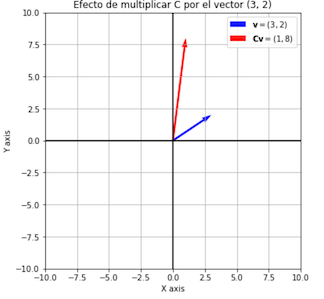

In [16]:
C=np.array([
    [-1,-1],
    [-2,1]
])
v=np.array([2,3])
z=np.dot(C,v)
z

array([-5, -1])

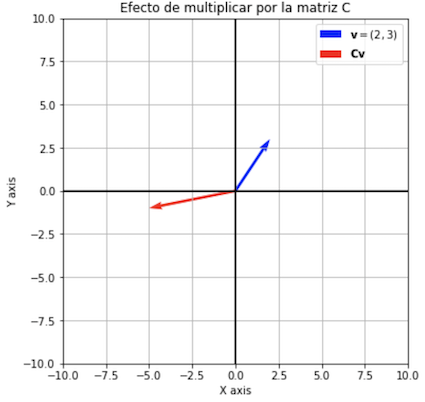

#### Con el siguiente código podemos probar diferentes consiguraciones de una matriz y vector para ver el efecto resultante:

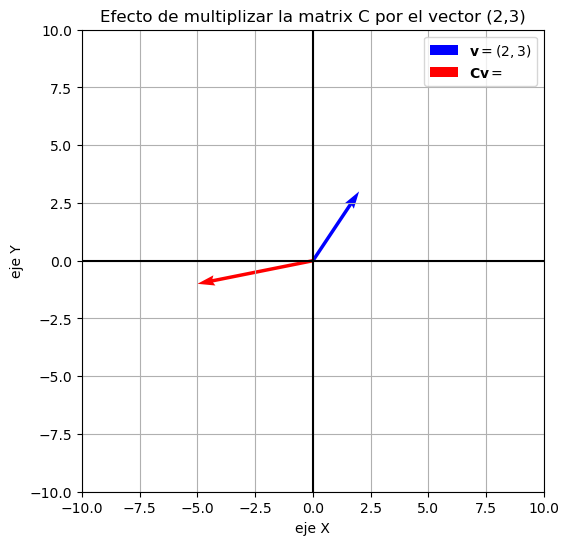

In [18]:

C=np.array([[-1,-1],[-2,1]])
v3=np.array([2,3])
resulting_v3=np.dot(C,v3)

#Crear la gráfica
plt.figure(figsize=(8,6))
plt.quiver(0,0,v3[0],v3[1],angles='xy',scale_units='xy',scale=1,color='blue',label=r'$\mathbf{v}=(2,3)$')
plt.quiver(0,0,resulting_v3[0],resulting_v3[1],angles='xy',scale_units='xy',scale=1,color='red',label=r'$\mathbf{Cv}=$')

#Límites
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().set_aspect('equal',adjustable='box')

#Agregar cuadrícula, etiquetas,títulos y leyendas. 
plt.grid(True)
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.xlabel('eje X')
plt.ylabel('eje Y')
plt.title('Efecto de multiplizar la matrix C por el vector (2,3)')
plt.legend()

### Algunas matrices importantes:

**Matriz Identidad**: 

La matriz identidad de orden $n$, denotada como $I_n$, es una matriz cuadrada de $n \times n$ donde todos los elementos en la diagonal principal son 1 y el resto son 0. La definición es:

$$ I_n = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix} $$

Por ejemplo, la matriz identidad de orden 3, $I_3$, es:

$$ I_3 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} $$

Cuando multiplicamos la matriz identidad $I_3$ por un vector tridimensional $\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}$, obtenemos el mismo vector $\mathbf{v}$ como resultado:

$$ I_3\mathbf{v} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} $$


In [20]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
#Ejemplo: 
v=np.array([2,3,4])
I=np.eye(3)
I@v

array([2., 3., 4.])

**Matriz Inversa**:
    
La inversa de una matriz cuadrada de orden $n$, denotada como $A^{-1}$, es una matriz tal que cuando se multiplica por la matriz original $A$, resulta en la matriz identidad $I_n$. Matemáticamente, se define como:

$$ A \cdot A^{-1} = A^{-1} \cdot A = I_n $$

Donde $I_n$ es la matriz identidad de orden $n$.

Por ejemplo, consideremos la matriz $A = \begin{bmatrix} 4 & 7 \\ 2 & 6 \end{bmatrix}$. La inversa de $A$, denotada como $A^{-1}$, se calcula y resulta ser:

$$ A^{-1} = \frac{1}{(4 \cdot 6 - 7 \cdot 2)} \begin{bmatrix} 6 & -7 \\ -2 & 4 \end{bmatrix} = \begin{bmatrix} 0.6 & -0.7 \\ -0.2 & 0.4 \end{bmatrix} $$

Si multiplicamos $A$ por $A^{-1}$, obtenemos:

$$ A \cdot A^{-1} = \begin{bmatrix} 4 & 7 \\ 2 & 6 \end{bmatrix} \begin{bmatrix} 0.6 & -0.7 \\ -0.2 & 0.4 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = I_2 $$


In [21]:
A=np.array([
    [4,7],
    [2,6]
    
])
A


array([[4, 7],
       [2, 6]])

In [22]:
#para calcular la inversa, usamos .inv() de linear algebrea ('la')
A_inv=la.inv(A)
A_inv

array([[ 0.6, -0.7],
       [-0.2,  0.4]])

In [24]:
res=np.dot(A,A_inv)
res

array([[ 1.00000000e+00, -1.11022302e-16],
       [ 1.11022302e-16,  1.00000000e+00]])

In [ ]:
#Además si aplico la inversa de una matriz al producto de esa matriz con un vector, 
#recupero el vector original  (C^-1) x (Cv)=Iv= v

In [25]:
C=np.array([
    [1,2],
    [0,1]   
])
v=np.array([2,3])
z=C@v
z

array([8, 3])

In [26]:
np.dot(la.inv(C),z)

array([2., 3.])

###  Usando la inversa para resolver sistemas de ecuaciones lineales

#### Estos sistemas pueden representarse de la forma $Ax = b$, 

<br>

donde $x$ y $b$ son vectores y $A$ una matriz.


Consideremos el siguiente sistema de ecuaciones lineales:


$$x+y−2z=1$$ 
$$2x−4y+z=0$$ 
$$2y−3z=−1$$

 
<br>
\begin{equation}
\begin{aligned}
x + y - 2z &= 1  \\
2x - 4y + z &= 0  \\
2y - 3z &= -1
\end{aligned}
\end{equation}
<br>

Podemos representarlo de forma matricial de la siguiente manera:


$$
A\mathbf{w} = \begin{bmatrix} 1 & 1 & -2 \\ 2 & -4 & 1 \\ 0 & 2 & -3 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} =  \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix}
$$

donde $\mathbf{w} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$

In [49]:
A=np.array([
    [1,1,-2],
    [2,-4,1],
    [0,2,-3]
])
A

array([[ 1,  1, -2],
       [ 2, -4,  1],
       [ 0,  2, -3]])

In [30]:
A_inv=la.inv(A)
A_inv

array([[ 1.25 , -0.125, -0.875],
       [ 0.75 , -0.375, -0.625],
       [ 0.5  , -0.25 , -0.75 ]])

In [29]:
b1=np.array([1,0,-1])
b1

array([ 1,  0, -1])

In [31]:
w=np.dot(A_inv,b1)
w

array([2.125, 1.375, 1.25 ])

In [32]:
A@w

array([ 1.00000000e+00, -2.22044605e-16, -1.00000000e+00])

In [33]:
-0

0

In [34]:
np.round(A@w)

array([ 1., -0., -1.])

In [35]:
np.round(A@w)[1]

-0.0

In [36]:
np.round(A@w)[1]+0

0.0

### ¿Qué quiere decir lo anterior?


* Podemos generar el vector $(1,0,-1)^t$ como combinación lineal de las columnas de $A$
* Esto es porque las columnas de $A$ son linealmente INDEPENDIENTES (l.i)
* Al ser 3 vectores l.i. en $R^3$, forman una base. --> puedo generar cualquier vector en $R^3$ con ellas.

### Otro ejemplo:
Consideremos el siguiente sistema de ecuaciones lineales:

$$x+y+z=6$$ 
$$x−y+2z=5$$ 
$$x-y−3z=−10$$

 
<br>
<br>

En forma matricial:


$$
B\mathbf{v} = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -1 & 2 \\ 1 & -1 & -3 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} =  \begin{bmatrix} 6 \\ 5 \\ -10 \end{bmatrix}
$$

donde $\mathbf{v} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$

In [37]:
B=np.array([
    [1,1,1],
    [1,-1,2],
    [1,-1,-3]
])
B
b2=np.array([6,5,-10])
v=np.dot(la.inv(B),b2)
v

array([1., 2., 3.])

In [38]:
B@v

array([  6.,   5., -10.])

### Podemos usar la función `la.solve()` para resolver estos sistemas directamente:

In [39]:
la.solve(B,b2)

array([1., 2., 3.])

In [40]:
la.solve(A,b1)

array([2.125, 1.375, 1.25 ])

#### Esto sólo funciona cuando la matriz es invertible.
- Cuando no lo es, esto quiere decir que sus columnas son LINEALMENTE DEPENDIENTES y por tanto no podemos generar un vector mediante combinaciones lineales de sus columnas.

In [41]:
B=np.array([
    [1,1,1],
    [2,2,2],
    [1,-1,-3]
])
B
b3=np.array([6,5,-10])
v=np.dot(la.inv(B),b3)
v

LinAlgError: Singular matrix

In [44]:
la.solve(B,b3)#esto pasa porque lascolumnas/filas de C son L.D. y por lo tanto no puedo generar el
#vector (6,5,-10) como una combinación lineal de ella. 

LinAlgError: Singular matrix

### Matriz transpuesta: definición

Si tenemos una matriz $A$ de tamaño $m \times n$, su transpuesta, denotada como $A^T$, es una nueva matriz de tamaño $n \times m$ formada al escribir las filas de $A$ como columnas en $A^T$. Matemáticamente, esto se expresa como:

Si $A = [a_{ij}]$ donde $1 \leq i \leq m$ y $1 \leq j \leq n$, entonces $A^T = [a_{ji}]$ donde $1 \leq j \leq n$ y $1 \leq i \leq m$. Esto significa que el elemento en la $i$-ésima fila y $j$-ésima columna de $A$ se convierte en el elemento en la $j$-ésima fila y $i$-ésima columna de $A^T$.



Consideremos la matriz $A$:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} $$

La transpuesta de $A$, denotada por $A^T$, es:

$$ A^T = \begin{bmatrix} 1 & 3 & 5 \\ 2 & 4 & 6 \end{bmatrix} $$

Las filas de $A$ se han convertido en las columnas de $A^T$.


In [50]:
A

array([[ 1,  1, -2],
       [ 2, -4,  1],
       [ 0,  2, -3]])

In [51]:
A.T

array([[ 1,  2,  0],
       [ 1, -4,  2],
       [-2,  1, -3]])

### Matriz simétrica

Una matriz simétrica es una matriz cuadrada que es igual a su transpuesta. Es decir, una matriz $A$ de tamaño $n \times n$ es simétrica si $A = A^T$, donde $A^T$ denota la transpuesta de $A$. Esto significa que los elementos de $A$ satisfacen la condición $a_{ij} = a_{ji}$ para todos los índices $i$ y $j$.

Por ejemplo, una matriz simétrica de $3 \times 3$ podría ser:

$$ A = \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix} $$

En esta matriz, se puede observar que $A = A^T$, es decir, los elementos de las filas de $A$ son iguales a los elementos de las columnas correspondientes.


* Resultado $(AB)^t = B^t A^t$ 

In [190]:
np.random.seed(234) #para que todos la puedan reproducir
B=np.random.randint(-10,10,(3,3)) #Muestra de la distribución uniforme discreta
print(B)

[[-2 -6 -9]
 [-7 -3  9]
 [ 6 -7  9]]


In [191]:
AB=np.dot(A,B)
print(AB)

[[-21   5 -18]
 [ 30  -7 -45]
 [-32  15  -9]]


In [192]:
print(AB.T)

[[-21  30 -32]
 [  5  -7  15]
 [-18 -45  -9]]


In [193]:
BtAt=np.dot(B.T,A.T)
BtAt

array([[-21,  30, -32],
       [  5,  -7,  15],
       [-18, -45,  -9]])

In [45]:
import sys

In [46]:
sys.version

'3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]'